In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h3> Task 2 <h3>
Plot the data from the measurement record log ﬁle. What did you observe?
Determine the gain ki and bias bi for each body axis i = {x, y, z}. Write down the
results in your report. Note that, the coordinate system of IMU sensor can be diﬀerent than those from
camera and other sensors.<\br>
<br>Gain of the selected axis:
<br>$k_i = \frac{a_u-a_d}{2g}$
<br>Bias of the selected axis: 
<br>$b_i = \frac{a_u+a_d}{2}$

In [64]:
input_data2 = pd.read_csv(r'imu_calibration_task2.csv',header=None)
print("Shape of the input is: ", input_data2.shape)

timestamps = input_data2.iloc[:,0]

linear_acceleration_x = input_data2.iloc[:,1]
linear_acceleration_y = input_data2.iloc[:,2]
linear_acceleration_z = input_data2.iloc[:,3]

roll = input_data2.iloc[:,4]
pitch = input_data2.iloc[:,5]

gyro_x = input_data2.iloc[:,6]
gyro_y = input_data2.iloc[:,7]
gyro_z = input_data2.iloc[:,8]

magnetormeter_x = input_data2.iloc[:,9]
magnetormeter_y = input_data2.iloc[:,10]
magnetormeter_z = input_data2.iloc[:,11]


Shape of the input is:  (2768, 12)


### Visualizing the data

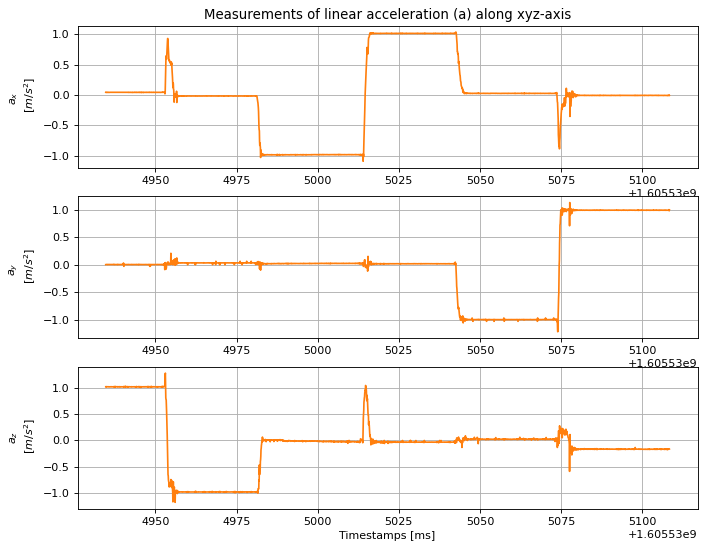

In [65]:
# Plotting the linear acceleration 
plt.figure(1 ,figsize=(10, 8), dpi=80)

plt.subplot(311)
plt.plot(timestamps,linear_acceleration_x,'tab:orange')
plt.grid(b=None, which='major', axis='both')
plt.title("Measurements of linear acceleration (a) along xyz-axis")
plt.ylabel("$a_x$  \n [$m/s^2$]")

plt.subplot(312)
plt.plot(timestamps,linear_acceleration_y,'tab:orange')
plt.grid(b=None, which='major', axis='both')
plt.ylabel("$a_y$  \n [$m/s^2$]")

plt.subplot(313)
plt.plot(timestamps,linear_acceleration_z,'tab:orange')
plt.grid(b=None, which='major', axis='both')
plt.xlabel("Timestamps [ms]")
plt.ylabel("$a_z$ \n [$m/s^2$]")

plt.savefig('linear_acceleration_xyz_task2.png')
plt.show()

### Notice:
- According to the graph, the robot was firstly rotated around z-axis, then it was flipped around x-axis and finally around y-axis
- It can be seen that not all the data of linear acceleration is needed for the gain calculation, so for each axis only meaningful data is chosen. Selected data is shown in the following figure. Then data is splitted into half accounting for up and down position in the measurement.

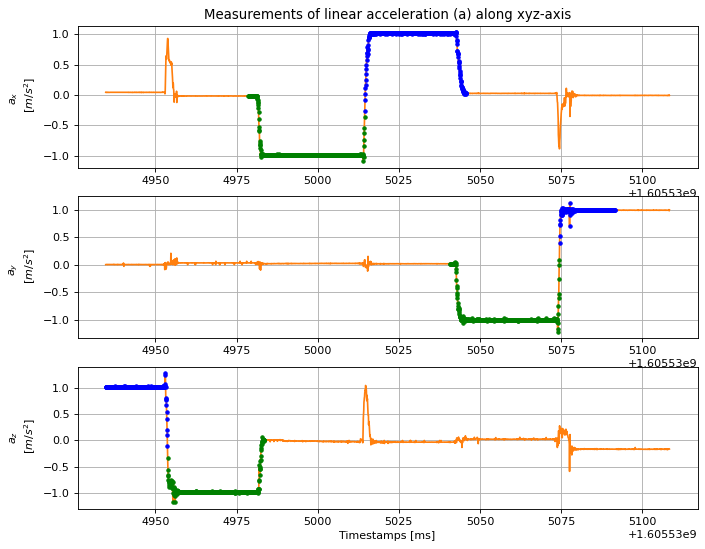

In [66]:
range_ax_up = range(1270,1770,1)
range_ay_up = range(2228,2500,1)
range_az_up = range(0,304,1)

range_ax_down = range(700,1270,1)
range_ay_down = range(1690,2228,1)
range_az_down = range(304,780,1)

plt.figure(figsize=(10, 8), dpi=80)

plt.subplot(311)
plt.plot(timestamps,linear_acceleration_x,'tab:orange')
plt.plot(timestamps[range_ax_up],linear_acceleration_x[range_ax_up],'b.')
plt.plot(timestamps[range_ax_down],linear_acceleration_x[range_ax_down],'g.')
plt.grid(b=None, which='major', axis='both')
plt.title("Measurements of linear acceleration (a) along xyz-axis")
plt.ylabel("$a_x$  \n [$m/s^2$]")

plt.subplot(312)
plt.plot(timestamps,linear_acceleration_y,'tab:orange')
plt.plot(timestamps[range_ay_up],linear_acceleration_y[range_ay_up],'b.')
plt.plot(timestamps[range_ay_down],linear_acceleration_y[range_ay_down],'g.')
plt.grid(b=None, which='major', axis='both')
plt.ylabel("$a_y$  \n [$m/s^2$]")

plt.subplot(313)
plt.plot(timestamps,linear_acceleration_z,'tab:orange')
plt.plot(timestamps[range_az_up],linear_acceleration_z[range_az_up],'b.')
plt.plot(timestamps[range_az_down],linear_acceleration_z[range_az_down],'g.')
plt.grid(b=None, which='major', axis='both')
plt.xlabel("Timestamps [ms]")
plt.ylabel("$a_z$ \n [$m/s^2$]")

plt.savefig('linear_acceleration_xyz_task2.png')
plt.show()

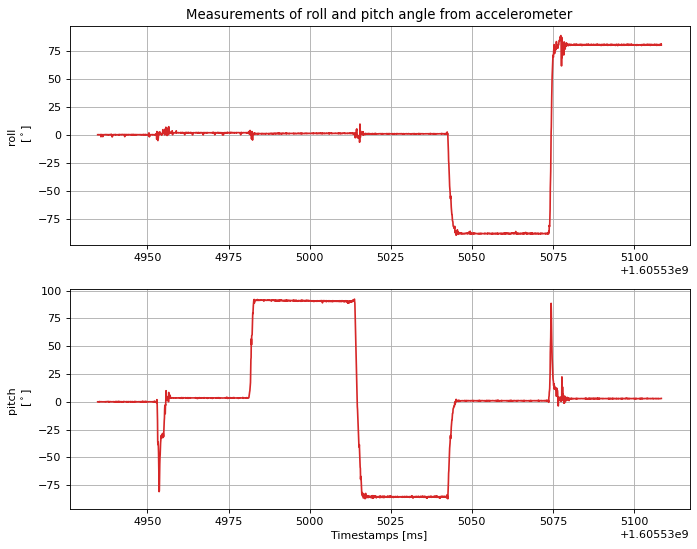

In [67]:
# Plotting roll and pitch
plt.figure(2 ,figsize=(10, 8), dpi=80)

plt.subplot(211)
plt.plot(timestamps, roll,'tab:red')
plt.grid(b = None, which = 'major', axis = 'both')
plt.title("Measurements of roll and pitch angle from accelerometer")
plt.ylabel("roll \n [$^\circ$]")

plt.subplot(212)
plt.plot(timestamps, pitch,'tab:red')
plt.grid(b = None, which = 'major', axis = 'both')
plt.xlabel("Timestamps [ms]")
plt.ylabel("pitch \n [$^\circ$]")

plt.savefig('roll_and_pitch_task2.png')
plt.show()

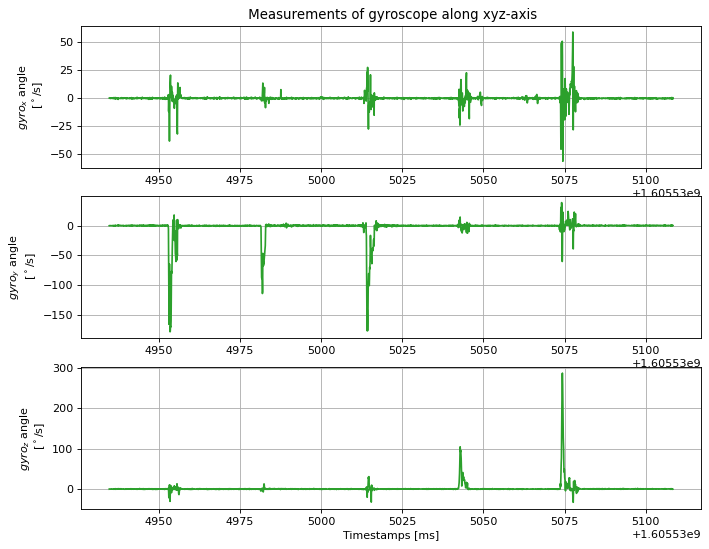

In [68]:
# Plotting gyroscope measurements
plt.figure(3 ,figsize=(10, 8), dpi=80)

plt.subplot(311)
plt.plot(timestamps, gyro_x,'tab:green')
plt.grid(b = None, which = 'major', axis = 'both')
plt.title(" Measurements of gyroscope along xyz-axis")
plt.ylabel("$gyro_x$ angle \n [$^\circ$/s]")

plt.subplot(312)
plt.plot(timestamps, gyro_y,'tab:green')
plt.grid(b = None, which = 'major', axis = 'both')
plt.ylabel("$gyro_y$ angle \n [$^\circ$/s]")

plt.subplot(313)
plt.plot(timestamps, gyro_z,'tab:green')
plt.grid(b = None, which = 'major', axis = 'both')
plt.xlabel("Timestamps [ms]")
plt.ylabel("$gyro_z$ angle \n [$^\circ$/s]")

plt.savefig('gyro_xyz_task2.png')
plt.show()

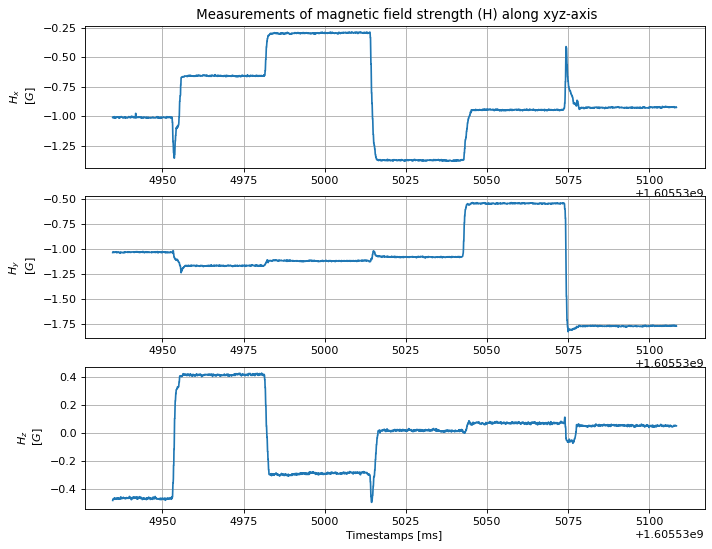

In [69]:
# Plotting the magnetometer measurements 
plt.figure(4 ,figsize=(10, 8), dpi=80)

plt.subplot(311)
plt.plot(timestamps, magnetormeter_x,'tab:blue')
plt.grid(b = None, which = 'major', axis = 'both')
plt.title(" Measurements of magnetic field strength (H) along xyz-axis")
plt.ylabel("$H_x$ \n [$G$]")

plt.subplot(312)
plt.plot(timestamps, magnetormeter_y,'tab:blue')
plt.grid(b = None, which = 'major', axis = 'both')
plt.ylabel("$H_y$ \n [$G$]")

plt.subplot(313)
plt.plot(timestamps, magnetormeter_z,'tab:blue')
plt.grid(b = None, which = 'major', axis = 'both')
plt.xlabel("Timestamps [ms]")
plt.ylabel("$H_z$ \n [$G$]")

plt.savefig('magnetormeter_xyz_task2.png')
plt.show()

In [70]:
# Calculate gain and bias

# TODO check if a_u and a_d are correctly defined
num_rows, num_cols= input_data2.iloc[:,1:3].shape


a_ux = linear_acceleration_x[1270:1770]
a_uy = linear_acceleration_y[2228:2500]
a_uz = linear_acceleration_z[0:304]

a_dx = linear_acceleration_x[700:1270]
a_dy = linear_acceleration_y[1690:2228]
a_dz = linear_acceleration_z[304:780]

g = 9.81

# Gain of the selected axis
k_x = (np.average(a_ux) - np.average(a_dx)) / (2*g)
k_y = (np.average(a_uy) - np.average(a_dy)) / (2*g)
k_z = (np.average(a_uz) - np.average(a_dz)) / (2*g)

# Bias of the selected axis
b_x = (np.average(a_ux) + np.average(a_dx)) / 2
b_y = (np.average(a_uy) + np.average(a_dy)) / 2
b_z = (np.average(a_uz) + np.average(a_dz)) / 2

k_xyz = np.array([k_x, k_y, k_z])
b_xyz = np.array([b_x, b_y, b_z])

print("Gain k at each axis is: {}".format(k_xyz))
print("Bias b at each axis is: {}".format(b_xyz))

Gain k at each axis is: [0.09254456 0.09709749 0.09829576]
Bias b at each axis is: [0.01445466 0.02837339 0.03883709]
